In [1]:
library("neuralnet")

Warning message:
"package 'neuralnet' was built under R version 3.4.3"

In [2]:
filename = "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
housing <- read.table(filename)
colnames(housing) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", 
                       "RM", "AGE", "DIS", "RAD", "TAX", "PRATIO",
                      "B", "LSTAT", "MDEV")

In [3]:
housing <- housing[order(housing$MDEV),]

library(caret)
set.seed(5557)
indices <- createDataPartition(housing$MDEV, p=0.75, list=FALSE)
training <- housing[indices,]
testing <- housing[-indices,]
nrow(training)
nrow(testing)
testing$MDEV

Warning message:
"package 'caret' was built under R version 3.4.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"

[1] 381

[1] 125

[1]  5.6  7.2  8.1  8.5 10.5 10.8 11.0 11.3 11.5 11.8 11.8 11.9 12.0 12.3 12.7
 [16] 13.1 13.3 13.5 13.6 14.1 14.2 14.3 14.5 14.6 14.8 14.9 15.2 15.4 16.1 16.4
 [31] 16.7 17.4 17.8 17.9 18.2 18.4 18.4 18.5 18.5 18.7 18.8 18.9 18.9 19.1 19.4
 [46] 19.4 19.6 19.7 19.8 19.8 19.9 20.0 20.1 20.3 20.3 20.4 20.5 20.6 20.7 20.8
 [61] 20.8 20.9 21.0 21.6 21.6 21.7 21.7 21.8 21.9 22.0 22.0 22.0 22.2 22.6 22.7
 [76] 22.7 23.0 23.1 23.1 23.2 23.2 23.3 23.6 23.7 23.9 24.3 24.3 24.4 24.4 24.7
 [91] 24.8 25.0 25.0 25.0 26.5 27.0 27.1 27.5 28.0 28.4 28.7 29.0 29.1 29.6 29.8
[106] 30.1 31.2 31.5 32.0 32.2 32.4 32.7 33.1 35.1 35.4 36.2 36.2 37.3 37.6 41.7
[121] 42.8 46.0 46.7 50.0 50.0

In [4]:
nnet <- neuralnet(MDEV ~ CRIM + ZN + INDUS + CHAS + NOX 
                  + RM + AGE + DIS + RAD + TAX + PRATIO 
                  + B + LSTAT,
                 training, hidden=10, threshold=0.01)
nnet

$call
neuralnet(formula = MDEV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + 
    AGE + DIS + RAD + TAX + PRATIO + B + LSTAT, data = training, 
    hidden = 10, threshold = 0.01)

$response
    MDEV
399  5.0
406  5.0
400  6.3
415  7.0
490  7.0
402  7.2
416  7.2
388  7.4
417  7.5
404  8.3
426  8.3
420  8.4
439  8.4
398  8.5
438  8.7
385  8.8
419  8.8
430  9.5
437  9.6
393  9.7
380 10.2
389 10.2
427 10.2
381 10.4
418 10.4
387 10.5
382 10.9
428 10.9
425 11.7
435 11.7
407 11.9
403 12.1
397 12.5
448 12.6
395 12.7
457 12.7
440 12.8
450 13.0
34  13.1
379 13.1
396 13.1
33  13.2
378 13.3
476 13.3
143 13.4
424 13.4
436 13.4
451 13.4
35  13.5
21  13.6
146 13.8
374 13.8
375 13.8
394 13.8
475 13.8
26  13.9
377 13.9
141 14.0
432 14.1
456 14.1
434 14.3
49  14.4
142 14.4
24  14.5
431 14.5
479 14.6
455 14.9
459 14.9
11  15.0
376 15.0
411 15.0
391 15.1
23  15.2
452 15.2
153 15.3
150 15.4
25  15.6
135 15.6
144 15.6
147 15.6
156 15.6
127 15.7
62  16.0
311 16.1
433 16.1
128 16.2
316 16.2
414 16.3
9   16.5
343 16

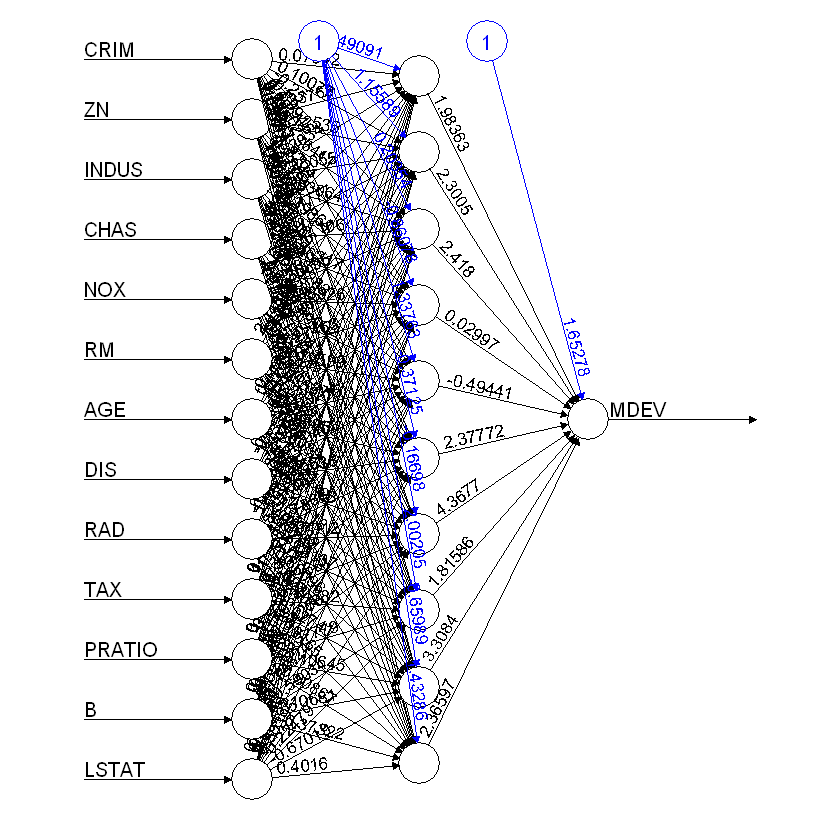

In [5]:
plot(nnet, rep="best")

In [6]:
results <- compute(nnet, testing[,-14])
diff <- results$net.result - testing$MDEV
sum( (diff - mean(diff) )^2 ) 

[1] 9275.74672